In [9]:
#searchs in Shopify's API for unfulfilled orders
!cd ../scanTable ; npm run-script unfulfilled_orders


> scan_orders@1.0.0 unfulfilled_orders /Users/peanut01/Documents/zx/repos/mx-beerhouse-fulfillments-monitor/scanTable
> env-cmd -f ./.env node unfulfilledOrders.js

null
43 orders received


In [11]:
#searchs in Shopify's API for fulfilled orders
!cd ../scanTable ; npm run-script fulfilled_orders


> scan_orders@1.0.0 fulfilled_orders /Users/peanut01/Documents/zx/repos/mx-beerhouse-fulfillments-monitor/scanTable
> env-cmd -f ./.env node fulfilledOrders.js

987 orders received


In [12]:
import pandas as pd

In [13]:
# Creates a dataframe with the API query results
df = pd.read_json('../scanTable/results/unfulfilledOrders.json', orient='records')

# Parses timestamps
df.created_at = df.created_at.apply(pd.to_datetime)

In [14]:
df_fulfilled = pd.read_json('../scanTable/results/fulfilledOrders.json', orient='records')

df_fulfilled.created_at = df_fulfilled.created_at.apply(pd.to_datetime)
df_fulfilled.fulfilled_at = df_fulfilled.fulfilled_at.apply(pd.to_datetime)

# Unfulfilled orders (count by 24 hours)

In [15]:
# Plots unfulfilled orders, if this cell does not display a plot, run it again
(df.groupby('created_at')
    .count()
    .resample('24H')
    .count()
    .plot(kind='bar', y='id', rot=90, figsize=(12, 6), grid=True, color=(1, .2, 1, .8), width=.9)
)

In [16]:
df.count()

id            43
created_at    43
name          43
dtype: int64

# Fulfilled orders (count by 24 h)

## By order created date


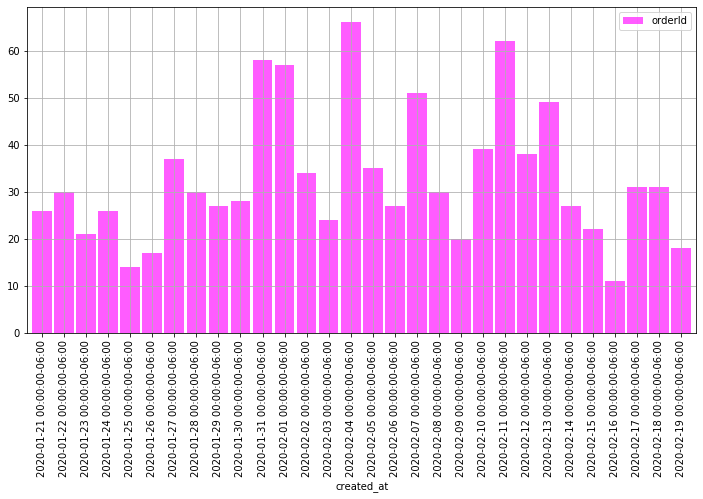

In [17]:
# Plots fulfilled orders, if this cell does not display a plot, run it again
(df_fulfilled.groupby('created_at')
    .count()
    .resample('24H')
    .count()
    .plot(kind='bar', y='orderId', rot=90, figsize=(12, 6), grid=True, color=(1, .2, 1, .8), width=.9)
)

## By fulfillment date


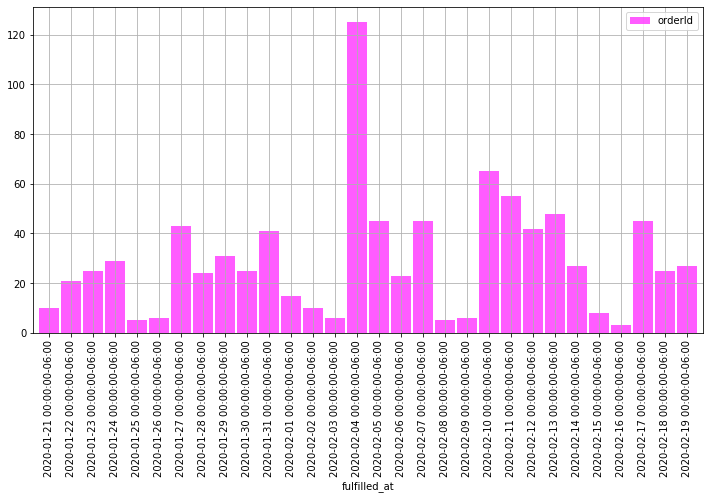

In [18]:
# Plots fulfilled orders, if this cell does not display a plot, run it again
(df_fulfilled.groupby('fulfilled_at')
    .count()
    .resample('24H')
    .count()
    .plot(kind='bar', y='orderId', rot=90, figsize=(12, 6), grid=True, color=(1, .2, 1, .8), width=.9)
)

In [19]:
df_fulfilled.count()

orderName       987
orderId         987
created_at      987
fulfilled_at    987
dtype: int64

In [20]:
df.to_csv('../scanTable/results/unfulfilled_orders.csv', index=False)
df_fulfilled.to_csv('../scanTable/results/fulfilled_orders.csv', index=False)